# Visualizations of estimates by PCA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

First, isolate data from trilingual speakers.

In [2]:
df = pd.read_csv("data/estimates_and_blp.csv")
df_tri = df[df['lang_profile']!="mono"].copy()
df.head()

,partID,cat_warning,cat_vowel_estimate,cat_vowel_std,cat_duration_estimate,cat_duration_std,cat_spectilt_estimate,cat_spectilt_std,spa_warning,spa_vowel_estimate,...,eng_warning,eng_vowel_estimate,eng_vowel_std,eng_duration_estimate,eng_duration_std,eng_spectilt_estimate,eng_spectilt_std,lang_profile,pc1,pc2
0,acj047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.252188,0.183914,0.971723,0.222588,0.390739,0.184323,mono,NaN,NaN
1,acj297,0,0.210356,0.146814,-0.085561,0.147077,-0.278363,0.150769,0,1.162825,...,0,1.307934,0.290871,2.409308,0.453406,0.588664,0.232368,l1_eng,3.764211,-1.240101
2,acr108,0,0.273684,0.162629,0.265210,0.169568,0.172382,0.160731,0,0.553943,...,0,-0.336151,0.181966,2.183468,0.426018,-0.140840,0.180522,l1_eng,3.094974,-0.507547
3,aei079,0,0.326162,0.151268,-0.253304,0.150526,0.110451,0.148743,0,0.187595,...,0,1.873218,0.376852,0.934558,0.214967,0.043377,0.187671,l1_eng,4.173198,2.576465
4,ael236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0.673082,0.205907,2.795683,0.598022,-0.222353,0.193451,mono,NaN,NaN


In [3]:
print("english errors: ", df.eng_warning.unique())
print(len(df))
df_eng_nowarnings = df[(df['eng_warning'].str.len()<=4) | (df_tri['eng_warning'].isna())].copy()
print(len(df_eng_nowarnings))
print("catalan errors: ", df_tri.cat_warning.unique())
print(len(df_tri))
df_cat_nowarnings = df_tri[(df_tri['cat_warning'].str.len()<=4) | (df_tri['cat_warning'].isna())].copy()
print(len(df_cat_nowarnings))
print("spanish errors: ", df_tri.spa_warning.unique())
df_spa_nowarnings = df_tri[(df_tri['spa_warning'].str.len()<=4) | (df_tri['spa_warning'].isna())].copy()
len(df_spa_nowarnings)

english errors:  ['0'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)'
 'list(message = "glm.fit: algorithm did not converge", call = NULL)']
68
64
catalan errors:  ['0' nan
 'list(message = "glm.fit: algorithm did not converge", call = NULL)'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)']
48
44
spanish errors:  ['0'
 'list(message = "glm.fit: fitted probabilities numerically 0 or 1 occurred", call = NULL)']


47

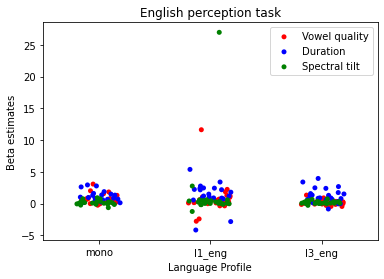

In [4]:
ax = sns.stripplot(x = df.lang_profile, y = df.eng_vowel_estimate, color = "r",
                   label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df.lang_profile, y = df.eng_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df.lang_profile, y = df.eng_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[3], handles[6]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "English perception task")

#plt.ylim([-2.5,3.5])

plt.show();

English perception with whiskers.

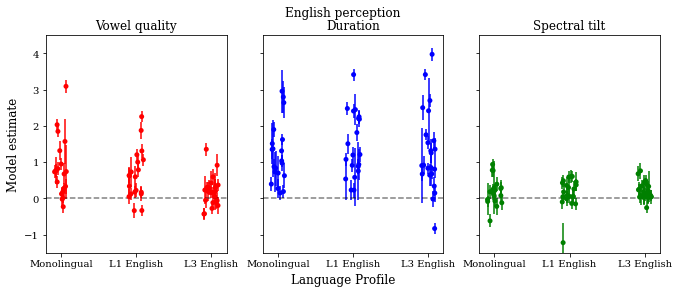

In [5]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.stripplot(ax = axes[0], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_vowel_estimate, color = "r")

x_coords_0 = []
y_coords_0 = []
for point_pair in axes[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords_0.append(x)
        y_coords_0.append(y)
        
axes[0].errorbar(x_coords_0, y_coords_0, yerr=df_eng_nowarnings.eng_vowel_std,
                 color = 'r', fmt=' ', zorder=-1)


axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.stripplot(ax = axes[1], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_duration_estimate, color = "b")

x_coords_1 = []
y_coords_1 = []
for point_pair in axes[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords_1.append(x)
        y_coords_1.append(y)
        
axes[1].errorbar(x_coords_1, y_coords_1, yerr=df_eng_nowarnings.eng_duration_std,
                 color = 'b', fmt=' ', zorder=-1)

sns.stripplot(ax = axes[2], x = df_eng_nowarnings.lang_profile,
                y = df_eng_nowarnings.eng_spectilt_estimate, color = "g")

x_coords_2 = []
y_coords_2 = []
for point_pair in axes[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords_2.append(x)
        y_coords_2.append(y)
        
axes[2].errorbar(x_coords_2, y_coords_2, yerr=df_eng_nowarnings.eng_spectilt_std,
                 color = 'g', fmt=' ', zorder=-1)
axes[2].set_title("Spectral tilt")

axes[0].set_xticklabels(['Monolingual', 'L1 English', 'L3 English'])
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
axes[1].set_ylabel("")
axes[2].set_ylabel("")
fig.supxlabel("Language Profile")
fig.suptitle("English perception")

plt.ylim([-1.5,4.5])
plt.savefig('figures/eng_estimates.jpg', format='jpg', dpi = 800)
plt.show();

English perception by first component only by trilinguals, with whiskers

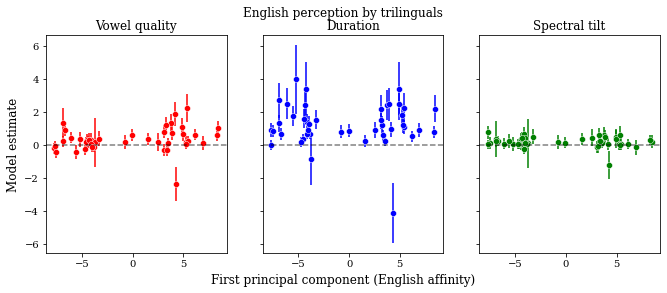

In [6]:
df_eng_tri = df_eng_nowarnings[df_eng_nowarnings['lang_profile']!="mono"].copy()

tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[0].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[1].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[2].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("English perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/eng_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

English perception of trilinguals by second component with whiskers

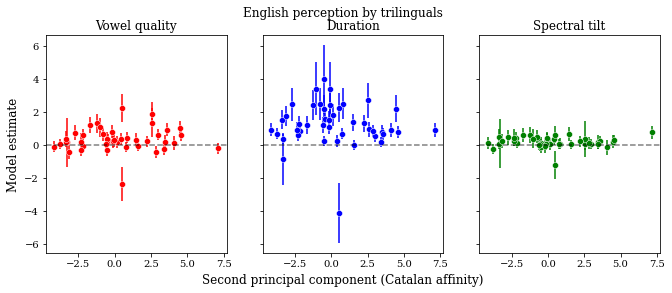

In [7]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[0].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[1].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[2].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("English perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/eng_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

Try and stack plots together:

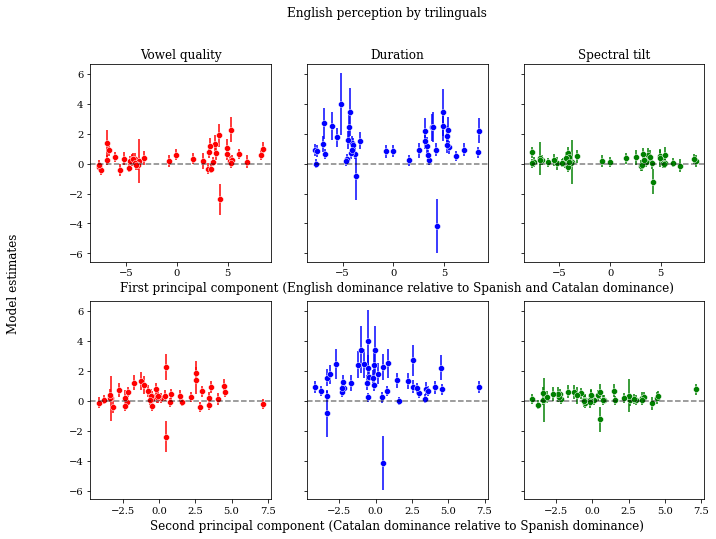

In [9]:
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(2,3, sharey = True, sharex = False, figsize = (11,8))
sns.scatterplot(ax = axes[0,0], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[0,0].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,0].set_title("Vowel quality")
axes[0,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,1].set_title("Duration")
axes[0,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[0,1], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[0,1].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[0,2], x = df_eng_tri.pc1,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[0,2].errorbar(df_eng_tri.pc1,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[0,2].set_title("Spectral tilt")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("First principal component (English dominance relative to Spanish and Catalan dominance)")
axes[0,2].set_xlabel("")
axes[0,0].set_ylabel("")
fig.supylabel("Model estimates")
# fig.supxlabel("Second principal component (English affinity)")

sns.scatterplot(ax = axes[1,0], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_vowel_estimate, color = "r")
axes[1,0].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_vowel_estimate,
                 yerr=2*df_eng_tri.eng_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[1,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1,0].set_title("")
axes[1,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
# axes[1,1].set_title("First principal component (English affinity)")
axes[1,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1,1], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_duration_estimate, color = "b")
axes[1,1].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_duration_estimate,
                 yerr=2*df_eng_tri.eng_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[1,2], x = df_eng_tri.pc2,
                y = df_eng_tri.eng_spectilt_estimate, color = "g")
axes[1,2].errorbar(df_eng_tri.pc2,
                 df_eng_tri.eng_spectilt_estimate,
                 yerr=2*df_eng_tri.eng_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[1,2].set_title("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("Second principal component (Catalan dominance relative to Spanish dominance)")
axes[1,2].set_xlabel("")
axes[1,0].set_ylabel("")
# fig.supxlabel("First principal component (English affinity)")
fig.suptitle("English perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/eng_estimates_pc1pc2.jpg', format='jpg', dpi = 800)
plt.show();

Catalan perception by predetermined language profile:

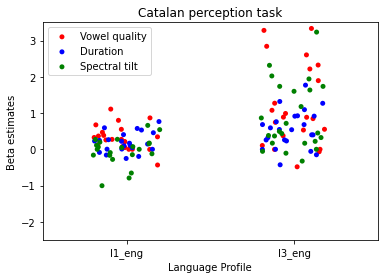

In [75]:
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile, y = df_cat_nowarnings.cat_vowel_estimate,
                   color = "r", label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile,
                   y = df_cat_nowarnings.cat_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df_cat_nowarnings.lang_profile,
                   y = df_cat_nowarnings.cat_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[2], handles[4]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "Catalan perception task")

plt.ylim([-2.5,3.5])

plt.show();

Catalan perception by first component (English affinity):

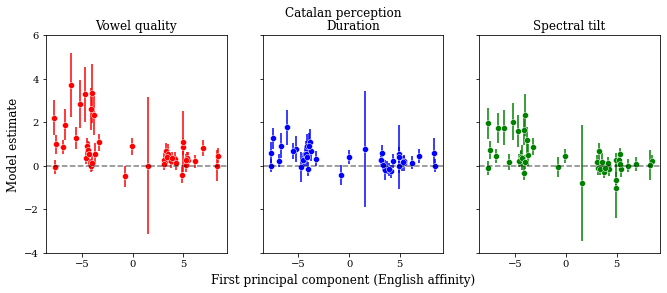

In [123]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[0].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[1].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[2].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Catalan perception")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

plt.ylim([-4,6])
plt.savefig('figures/cat_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

Catalan perception across second principal component

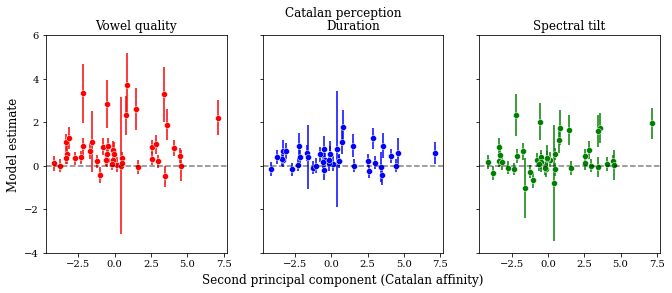

In [124]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[0].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[1].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[2].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("Catalan perception")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

plt.ylim([-4,6])
plt.savefig('figures/cat_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

Stack plots together:

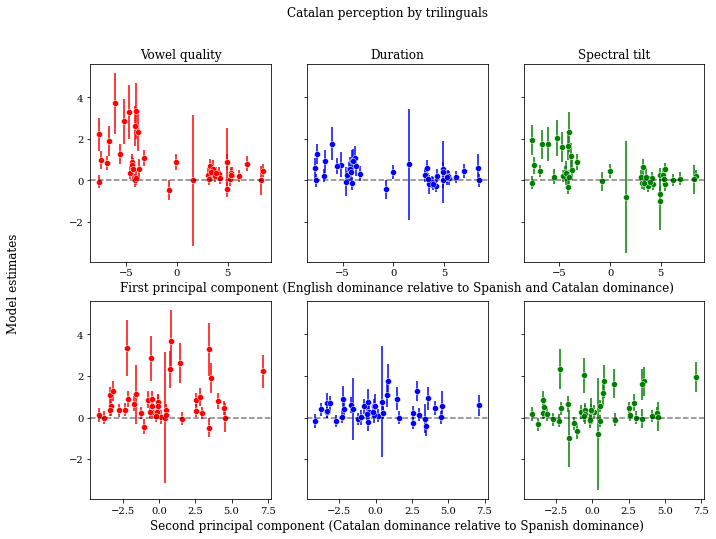

In [10]:
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(2,3, sharey = True, sharex = False, figsize = (11,8))
sns.scatterplot(ax = axes[0,0], x = df_eng_tri.pc1,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[0,0].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,0].set_title("Vowel quality")
axes[0,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,1].set_title("Duration")
axes[0,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[0,1], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[0,1].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[0,2], x = df_cat_nowarnings.pc1,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[0,2].errorbar(df_cat_nowarnings.pc1,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[0,2].set_title("Spectral tilt")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("First principal component (English dominance relative to Spanish and Catalan dominance)")
axes[0,2].set_xlabel("")
axes[0,0].set_ylabel("")
fig.supylabel("Model estimates")
# fig.supxlabel("Second principal component (English affinity)")

sns.scatterplot(ax = axes[1,0], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_vowel_estimate, color = "r")
axes[1,0].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_vowel_estimate,
                 yerr=2*df_cat_nowarnings.cat_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[1,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1,0].set_title("")
axes[1,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
# axes[1,1].set_title("First principal component (English affinity)")
axes[1,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1,1], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_duration_estimate, color = "b")
axes[1,1].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_duration_estimate,
                 yerr=2*df_cat_nowarnings.cat_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[1,2], x = df_cat_nowarnings.pc2,
                y = df_cat_nowarnings.cat_spectilt_estimate, color = "g")
axes[1,2].errorbar(df_cat_nowarnings.pc2,
                 df_cat_nowarnings.cat_spectilt_estimate,
                 yerr=2*df_cat_nowarnings.cat_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[1,2].set_title("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("Second principal component (Catalan dominance relative to Spanish dominance)")
axes[1,2].set_xlabel("")
axes[1,0].set_ylabel("")
# fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Catalan perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/cat_estimates_pc1pc2.jpg', format='jpg', dpi = 800)
plt.show();

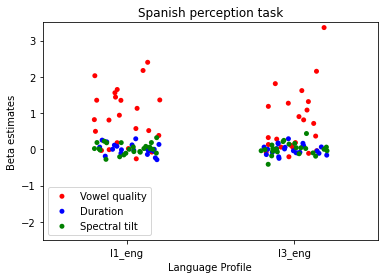

In [67]:
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_vowel_estimate, color = "r",
                   label = "Vowel quality", jitter = 0.2)
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_duration_estimate, color = "b",
                   label = "Duration", jitter = 0.2)
ax = sns.stripplot(x = df_tri.lang_profile, y = df_tri.spa_spectilt_estimate, color = "g",
                   label = "Spectral tilt", jitter = 0.2)
handles, labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[2], handles[4]]
labels = ['Vowel quality', 'Duration', 'Spectral tilt']

ax.legend(handles, labels)
ax.set(xlabel = "Language Profile",
      ylabel = "Beta estimates",
      title = "Spanish perception task")

plt.ylim([-2.5,3.5])

plt.show();

Spanish perception by the first principal component:

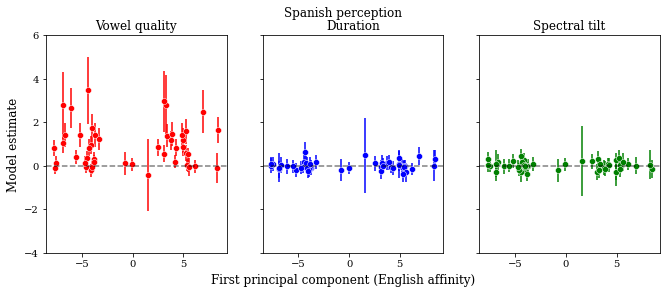

In [126]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[0].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[1].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[2].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Spanish perception")

plt.ylim([-4,6])
plt.savefig('figures/spa_estimates_pc1.jpg', format='jpg', dpi = 800)
plt.show();

Spanish perception by second principal component

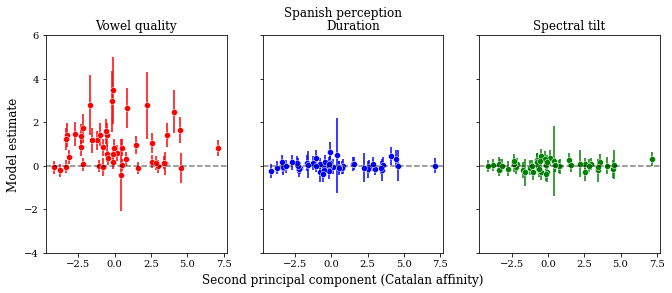

In [127]:
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(1,3, sharey = True, sharex = True, figsize = (11,4))
sns.scatterplot(ax = axes[0], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[0].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0].set_title("Vowel quality")
axes[1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1].set_title("Duration")
axes[2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[1].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[2], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[2].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[2].set_title("Spectral tilt")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")
axes[0].set_ylabel("Model estimate")
fig.supxlabel("Second principal component (Catalan affinity)")
fig.suptitle("Spanish perception")

plt.ylim([-4,6])
plt.savefig('figures/spa_estimates_pc2.jpg', format='jpg', dpi = 800)
plt.show();

Plot together:

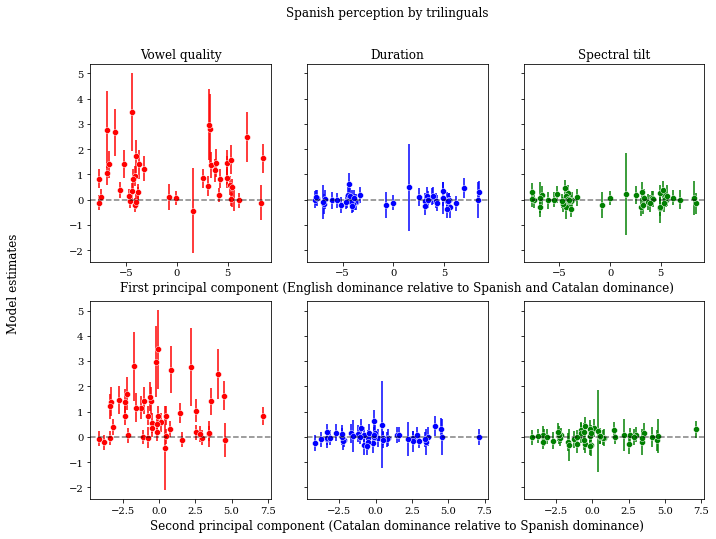

In [11]:
plt.rcParams.update(tex_fonts)

fig, axes = plt.subplots(2,3, sharey = True, sharex = False, figsize = (11,8))
sns.scatterplot(ax = axes[0,0], x = df_eng_tri.pc1,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[0,0].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[0,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,0].set_title("Vowel quality")
axes[0,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[0,1].set_title("Duration")
axes[0,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[0,1], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[0,1].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[0,2], x = df_spa_nowarnings.pc1,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[0,2].errorbar(df_spa_nowarnings.pc1,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[0,2].set_title("Spectral tilt")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("First principal component (English dominance relative to Spanish and Catalan dominance)")
axes[0,2].set_xlabel("")
axes[0,0].set_ylabel("")
fig.supylabel("Model estimates")
# fig.supxlabel("Second principal component (English affinity)")

sns.scatterplot(ax = axes[1,0], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_vowel_estimate, color = "r")
axes[1,0].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_vowel_estimate,
                 yerr=2*df_spa_nowarnings.spa_vowel_std, fmt=' ',
            zorder=-1, color = "r")
axes[1,0].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
axes[1,0].set_title("")
axes[1,1].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
# axes[1,1].set_title("First principal component (English affinity)")
axes[1,2].axhline(y = 0, color = "black", linestyle = "--", alpha = 0.5)
sns.scatterplot(ax = axes[1,1], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_duration_estimate, color = "b")
axes[1,1].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_duration_estimate,
                 yerr=2*df_spa_nowarnings.spa_duration_std, fmt=' ',
            zorder=-1, color = "b")
sns.scatterplot(ax = axes[1,2], x = df_spa_nowarnings.pc2,
                y = df_spa_nowarnings.spa_spectilt_estimate, color = "g")
axes[1,2].errorbar(df_spa_nowarnings.pc2,
                 df_spa_nowarnings.spa_spectilt_estimate,
                 yerr=2*df_spa_nowarnings.spa_spectilt_std, fmt=' ',
            zorder=-1, color = "g")
axes[1,2].set_title("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("Second principal component (Catalan dominance relative to Spanish dominance)")
axes[1,2].set_xlabel("")
axes[1,0].set_ylabel("")
# fig.supxlabel("First principal component (English affinity)")
fig.suptitle("Spanish perception by trilinguals")
# fig.supylabel("Vowel quality estimate")
# handles, labels = ax.get_legend_handles_labels()
# #handles = [handles[0],handles[2], handles[4]]
# labels = ['Vowel quality', 'Duration', 'Spectral tilt']

# ax.legend(handles, labels)
# ax.set(xlabel = "First Principal Component (English affinity)",
#       ylabel = "Beta estimates",
#       title = "Catalan perception task")

#plt.ylim([-4,6])
plt.savefig('figures/spa_estimates_pc1pc2.jpg', format='jpg', dpi = 800)
plt.show();

## Now plot principal components against estimates for each acoustic measure (all three languages at once)

In [14]:
import plotly.express as px

In [35]:
# change data frame to combine all estimates
df_tri.head()
df_spa = df_tri[['partID', 'spa_warning', 'spa_vowel_estimate', 'spa_vowel_std',
                'spa_duration_estimate', 'spa_duration_std', 'spa_spectilt_estimate',
                'spa_spectilt_std', 'pc1', 'pc2']].copy()
df_cat = df_tri[['partID', 'cat_warning', 'cat_vowel_estimate', 'cat_vowel_std',
                'cat_duration_estimate', 'cat_duration_std', 'cat_spectilt_estimate',
                'cat_spectilt_std', 'pc1', 'pc2']].copy()
df_eng = df_tri[['partID', 'eng_warning', 'eng_vowel_estimate', 'eng_vowel_std',
                'eng_duration_estimate', 'eng_duration_std', 'eng_spectilt_estimate',
                'eng_spectilt_std', 'pc1', 'pc2']].copy()
df_spa.head()

,partID,spa_warning,spa_vowel_estimate,spa_vowel_std,spa_duration_estimate,spa_duration_std,spa_spectilt_estimate,spa_spectilt_std,pc1,pc2
1,acj297,0,1.162825,0.222774,0.119551,0.166062,-0.088139,0.166021,3.764211,-1.240101
2,acr108,0,0.553943,0.195658,-0.063172,0.169932,-0.288236,0.183326,3.094974,-0.507547
3,aei079,0,0.187595,0.146195,-0.040082,0.144222,0.061279,0.145277,4.173198,2.576465
5,aes050,0,2.659812,0.460042,-0.029381,0.170380,-0.026580,0.167294,-6.094124,0.827822
6,afs116,0,-0.030668,0.143121,-0.144326,0.144107,0.081592,0.146629,6.165044,2.991184


In [36]:
df_spa['Language'] = "Spanish"
df_cat['Language'] = "Catalan"
df_eng['Language'] = "English"

df_spa = df_spa.rename(columns = {'spa_warning': "warning",
                                  'spa_vowel_estimate': "Vowel Estimate",
                                  'spa_vowel_std': "Vowel Std",
                                  'spa_duration_estimate': "Duration Estimate",
                                  'spa_duration_std': "Duration Std",
                                  'spa_spectilt_estimate': "Spectral Tilt Estimate",
                                  'spa_spectilt_std': "Spectral Tilt Std"})
df_cat = df_cat.rename(columns = {'cat_warning': "warning",
                                  'cat_vowel_estimate': "Vowel Estimate",
                                  'cat_vowel_std': "Vowel Std",
                                  'cat_duration_estimate': "Duration Estimate",
                                  'cat_duration_std': "Duration Std",
                                  'cat_spectilt_estimate': "Spectral Tilt Estimate",
                                  'cat_spectilt_std': "Spectral Tilt Std"})
df_eng = df_eng.rename(columns = {'eng_warning': "warning",
                                  'eng_vowel_estimate': "Vowel Estimate",
                                  'eng_vowel_std': "Vowel Std",
                                  'eng_duration_estimate': "Duration Estimate",
                                  'eng_duration_std': "Duration Std",
                                  'eng_spectilt_estimate': "Spectral Tilt Estimate",
                                  'eng_spectilt_std': "Spectral Tilt Std"})
df_spa.head()

,partID,warning,Vowel Estimate,Vowel Std,Duration Estimate,Duration Std,Spectral Tilt Estimate,Spectral Tilt Std,pc1,pc2,Language
1,acj297,0,1.162825,0.222774,0.119551,0.166062,-0.088139,0.166021,3.764211,-1.240101,Spanish
2,acr108,0,0.553943,0.195658,-0.063172,0.169932,-0.288236,0.183326,3.094974,-0.507547,Spanish
3,aei079,0,0.187595,0.146195,-0.040082,0.144222,0.061279,0.145277,4.173198,2.576465,Spanish
5,aes050,0,2.659812,0.460042,-0.029381,0.170380,-0.026580,0.167294,-6.094124,0.827822,Spanish
6,afs116,0,-0.030668,0.143121,-0.144326,0.144107,0.081592,0.146629,6.165044,2.991184,Spanish


In [37]:
df_tri_combined = df_spa.append([df_cat, df_eng], ignore_index = True)
df_tri_combined.tail()

,partID,warning,Vowel Estimate,Vowel Std,Duration Estimate,Duration Std,Spectral Tilt Estimate,Spectral Tilt Std,pc1,pc2,Language
139,rre101,0,-2.782637e-01,0.154512,0.145266,0.150938,0.034730,0.149064,-4.698206,3.409553,English
140,rrr070,"list(message = ""glm.fit: algorithm did not con...",-5.800000e-15,25181.769483,-0.000000,25181.769483,-0.000000,25439.170750,-3.845810,-0.133834,English
141,srm056,0,-6.405662e-02,0.146180,-0.019878,0.146865,0.022179,0.147047,-7.669850,1.580697,English
142,usm074,0,2.288847e-01,0.165441,1.312444,0.260591,0.210428,0.166484,-6.896680,2.215197,English
143,vrc053,0,1.190379e-01,0.215020,0.910490,0.219077,-0.153382,0.216782,6.934260,4.094739,English


In [38]:
print(len(df_tri_combined))
df_tri_combined = df_tri_combined[(df_tri_combined['warning'].str.len()<=4) | (df_tri_combined['warning'].isna())].copy()
len(df_tri_combined)

144


135

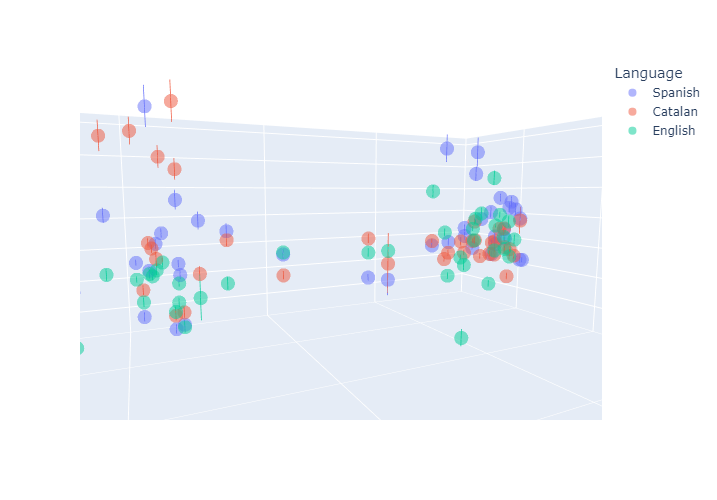

In [58]:
# tex_fonts = {
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 12,
#     "font.size": 10,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 10,
#     "xtick.labelsize": 10,
#     "ytick.labelsize": 10
# }
# plt.rcParams.update(tex_fonts)

# fig = plt.figure()

# x = df_spa_nowarnings['pc1']
# y = df_spa_nowarnings['pc2']
# z = df_spa_nowarnings['spa_vowel_estimate']

# ax.set_xlabel("Principal Component 1")
# ax.set_ylabel("Principal Component 2")
# ax.set_zlabel("Vowel Estimate")

fig = px.scatter_3d(x = df_tri_combined['pc1'],
                    error_z = df_tri_combined['Vowel Std']/2,
                    y = df_tri_combined['pc2'],
                    z = df_tri_combined['Vowel Estimate'],
                   color = df_tri_combined['Language'],
                   labels = {"x":"Principal Component 1",
                             "y":"Principal Component 2",
                             "z":"Vowel Estimate", 
                            "color" : "Language"},
                   opacity = 0.5, range_x = (-10,10), range_y = (-10,10),
                   width = 800, height = 500)

fig.show();

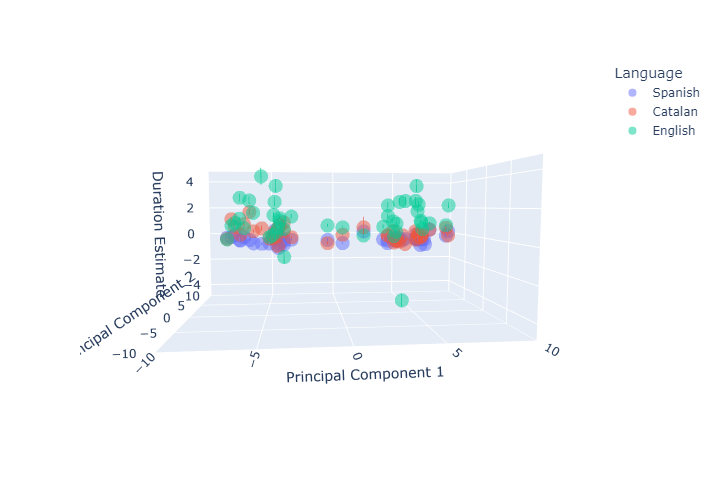

In [57]:
fig = px.scatter_3d(x = df_tri_combined['pc1'],
                    error_z = df_tri_combined['Duration Std']/2,
                    y = df_tri_combined['pc2'],
                    z = df_tri_combined['Duration Estimate'],
                   color = df_tri_combined['Language'],
                   labels = {"x":"Principal Component 1",
                             "y":"Principal Component 2",
                             "z":"Duration Estimate", 
                            "color" : "Language"},
                   opacity = 0.5, range_x = (-10,10), range_y = (-10,10),
                   width = 800, height = 500)

fig.show();

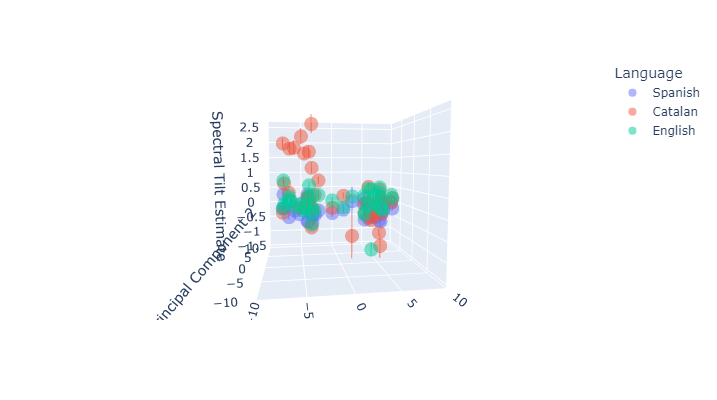

In [56]:
fig = px.scatter_3d(x = df_tri_combined['pc1'],
                    error_z = df_tri_combined['Spectral Tilt Std']/2,
                    y = df_tri_combined['pc2'],
                    z = df_tri_combined['Spectral Tilt Estimate'],
                   color = df_tri_combined['Language'],
                   labels = {"x":"Principal Component 1",
                             "y":"Principal Component 2",
                             "z":"Spectral Tilt Estimate", 
                            "color" : "Language"},
                   opacity = 0.5, range_x = (-10,10), range_y = (-10,10),
                   width = 800, height = 400)

fig.show();